<a href="https://colab.research.google.com/github/theJoChong/data-with-python/blob/main/Exploring_UoG_Domestic_Rankings_(2017_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the domestic performance of the University of Glasgow**

---

This is an initial analysis for a larger project examining the University of Glasgow’s domestic performance and its potential impact on student numbers.

The data used in this analysis was sourced from the Planning, Insight & Analytics (PIA) team at the University of Glasgow. More details are available on their page: www.gla.ac.uk/myglasgow/planning/.

**Data processing and analysis**

Ranking data was processed using Python to calculate average ranking scores from three UK league tables. This method streamlines the process and lays the foundation for future automation. The processed data was then imported into Excel and Power BI for further analysis and visualisation.

Excel was employed to handle student headcount data, due to its incomplete and inconsistent nature, for a more accurate result through meticulous handling. Once the student headcount data becomes more complete, Python will be used to automate the analytics process.

**Page Structure**

This page is divided into two sections:
*   The first section outlines the Python processing workflow.
*   The second section presents the final outcome of the project, including data visualisations and key findings.

## **Processing ranking data in Python**

In [105]:
# Step 1: Import libraries
from google.colab import drive
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
# Step 2: Load the dataset
drive.mount('/content/drive', force_remount=True)
file_path = "/content/drive/MyDrive/Upskill & Courses/Data Analyst/Code Division/Women and Data/Projects/Data Big Project/Data for Google Colab/Domestic League Tables - UoG 2015 to 2025.xlsx"
df = pd.read_excel(file_path)

Mounted at /content/drive


In [107]:
# Step 3: Check the data structure
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Compiler     5008 non-null   object 
 1   Institution  5008 non-null   object 
 2   Indicator    5008 non-null   object 
 3   Subject      5008 non-null   object 
 4   Score        5007 non-null   float64
 5   Rank         5008 non-null   int64  
 6   Year         5008 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 274.0+ KB


None

In [108]:
# Step 4: Initial cleaning
# Standardise 'Score' to a 100% scale across all league tables
def update_score():
    for index, score in enumerate(df["Score"]):
        if score > 100:
            df.loc[index, "Score"] = score / 1000 * 100
        elif score <= 100:
            df.loc[index, "Score"] = score
    return df
update_score()

,Compiler,Institution,Indicator,Subject,Score,Rank,Year
0,Complete University Guide,Abertay University,Overall,Institution Overall,55.7,86,2017
1,Complete University Guide,Abertay University,Overall,Institution Overall,59.9,88,2018
2,Complete University Guide,Abertay University,Overall,Institution Overall,56.3,91,2015
3,Complete University Guide,Abertay University,Overall,Institution Overall,53.6,95,2016
4,Complete University Guide,Abertay University,Overall,Institution Overall,53.1,96,2021
...,...,...,...,...,...,...,...
5003,The Times Sunday Times,York St John University,Overall,Institution Overall,49.4,89,2016
5004,The Times Sunday Times,York St John University,Overall,Institution Overall,49.6,93,2025
5005,The Times Sunday Times,York St John University,Overall,Institution Overall,45.3,102,2019
5006,The Times Sunday Times,York St John University,Overall,Institution Overall,43.1,110,2017


In [109]:
# Step 5: Reshape data
# Step 5.1: Calculate the percentile rank for the University of Glasgow in each year across multiple compilers
def calculate_percentile_rank(compiler):
    # Store the results in a list
    result_list = []
    # Get unique years for the selected compiler
    years = df["Year"].unique()
    # Loop through each year (ensure chronological order)
    for year in sorted(years):
        # Filter for Glasgow's ranking for the given compiler and year
        filtered_ranking = df[(df["Compiler"] == compiler) &
                               (df["Institution"] == "Glasgow") &
                               (df["Indicator"] == "Overall") &
                               (df["Year"] == year)]
        # Skip if no data for this year
        if filtered_ranking.empty:
            continue
        # Extract the Glasgow rank for this year
        glasgow_rank = filtered_ranking["Rank"].values[0]

        # Count the total number of universities ranked for this compiler and year
        uni_count = len(df[(df["Compiler"] == compiler) &
                           (df["Indicator"] == "Overall") &
                           (df["Year"] == year)])

        # Calculate the percentile rank for Glasgow University in this year
        percentile_rank = ((glasgow_rank - 1) / (uni_count - 1)) * 100

        # Add the result for this year
        result_list.append([compiler, year, glasgow_rank, uni_count, round(percentile_rank, 2)])

    results = pd.DataFrame(result_list, columns=["Compiler", "Year", "Rank", "Uni_Count", "Percentile"])
    return results

complete = calculate_percentile_rank("Complete University Guide")
guardian = calculate_percentile_rank("The Guardian")
times = calculate_percentile_rank("The Times Sunday Times")

# Combine results together
all_compilers = pd.concat([complete, guardian, times], ignore_index=True)
display(all_compilers)

,Compiler,Year,Rank,Uni_Count,Percentile
0,Complete University Guide,2015,30,123,23.77
1,Complete University Guide,2016,30,126,23.20
2,Complete University Guide,2017,29,127,22.22
3,Complete University Guide,2018,27,129,20.31
4,Complete University Guide,2019,24,131,17.69
5,Complete University Guide,2020,18,131,13.08
6,Complete University Guide,2021,19,130,13.95
7,Complete University Guide,2022,16,130,11.63
8,Complete University Guide,2023,23,130,17.05
9,Complete University Guide,2024,26,130,19.38


In [110]:
# Step 5.2: Calculate the mean of percentile rank across three tables
def mean_percentile():
  mean_percentile_list = []
  # Get unique years to loop through
  years = df["Year"].unique()
  # Get a list of compilers to loop through
  compilers = ["Complete University Guide", "The Guardian", "The Times Sunday Times"]

  # Get percentile ranks from each compiler for each year
  for year in sorted(years):
    percentiles = []
    # Get percentile rank for the given year and compiler
    for compiler in compilers:
        percentile = percentile_rank(compiler).query(f"Year == {year}")["Percentile"].values
        # If a percentile value is found, add it to the list
        if len(percentile) > 0:
          # Take the first (and only) value
          percentiles.append(percentile[0])

    # If percentiles from all three compilers are found, calculate the mean
    if len(percentiles) == 3:
        mean_percentile = sum(percentiles) / len(percentiles)
        mean_percentile_list.append([year, round(mean_percentile, 2)])

  mean_percentile = pd.DataFrame(mean_percentile_list, columns=["Year", "Mean_Percentile"])
  return mean_percentile

mean_percentile = mean_percentile()
display(mean_percentile)

,Year,Mean_Percentile
0,2016,20.84
1,2017,21.82
2,2018,17.83
3,2019,16.36
4,2020,11.82
5,2021,11.04
6,2022,9.45
7,2023,11.77
8,2024,12.59
9,2025,14.66


In [ ]:
# Step 6: Download datasets
all_compilers.to_csv("glasgow_percentile_ranks.csv", index=False)
mean_percentile.to_csv("mean_percentile_ranks.csv", index=False)

files.download("glasgow_percentile_ranks.csv")
files.download("mean_percentile_ranks.csv")


---

## **Findings and Implications**

### **Understanding Rankings and Scores Across League Tables**

This analysis examines the relationship between the University of Glasgow’s rankings and scores across domestic league tables, alongside its overall performance over the years.

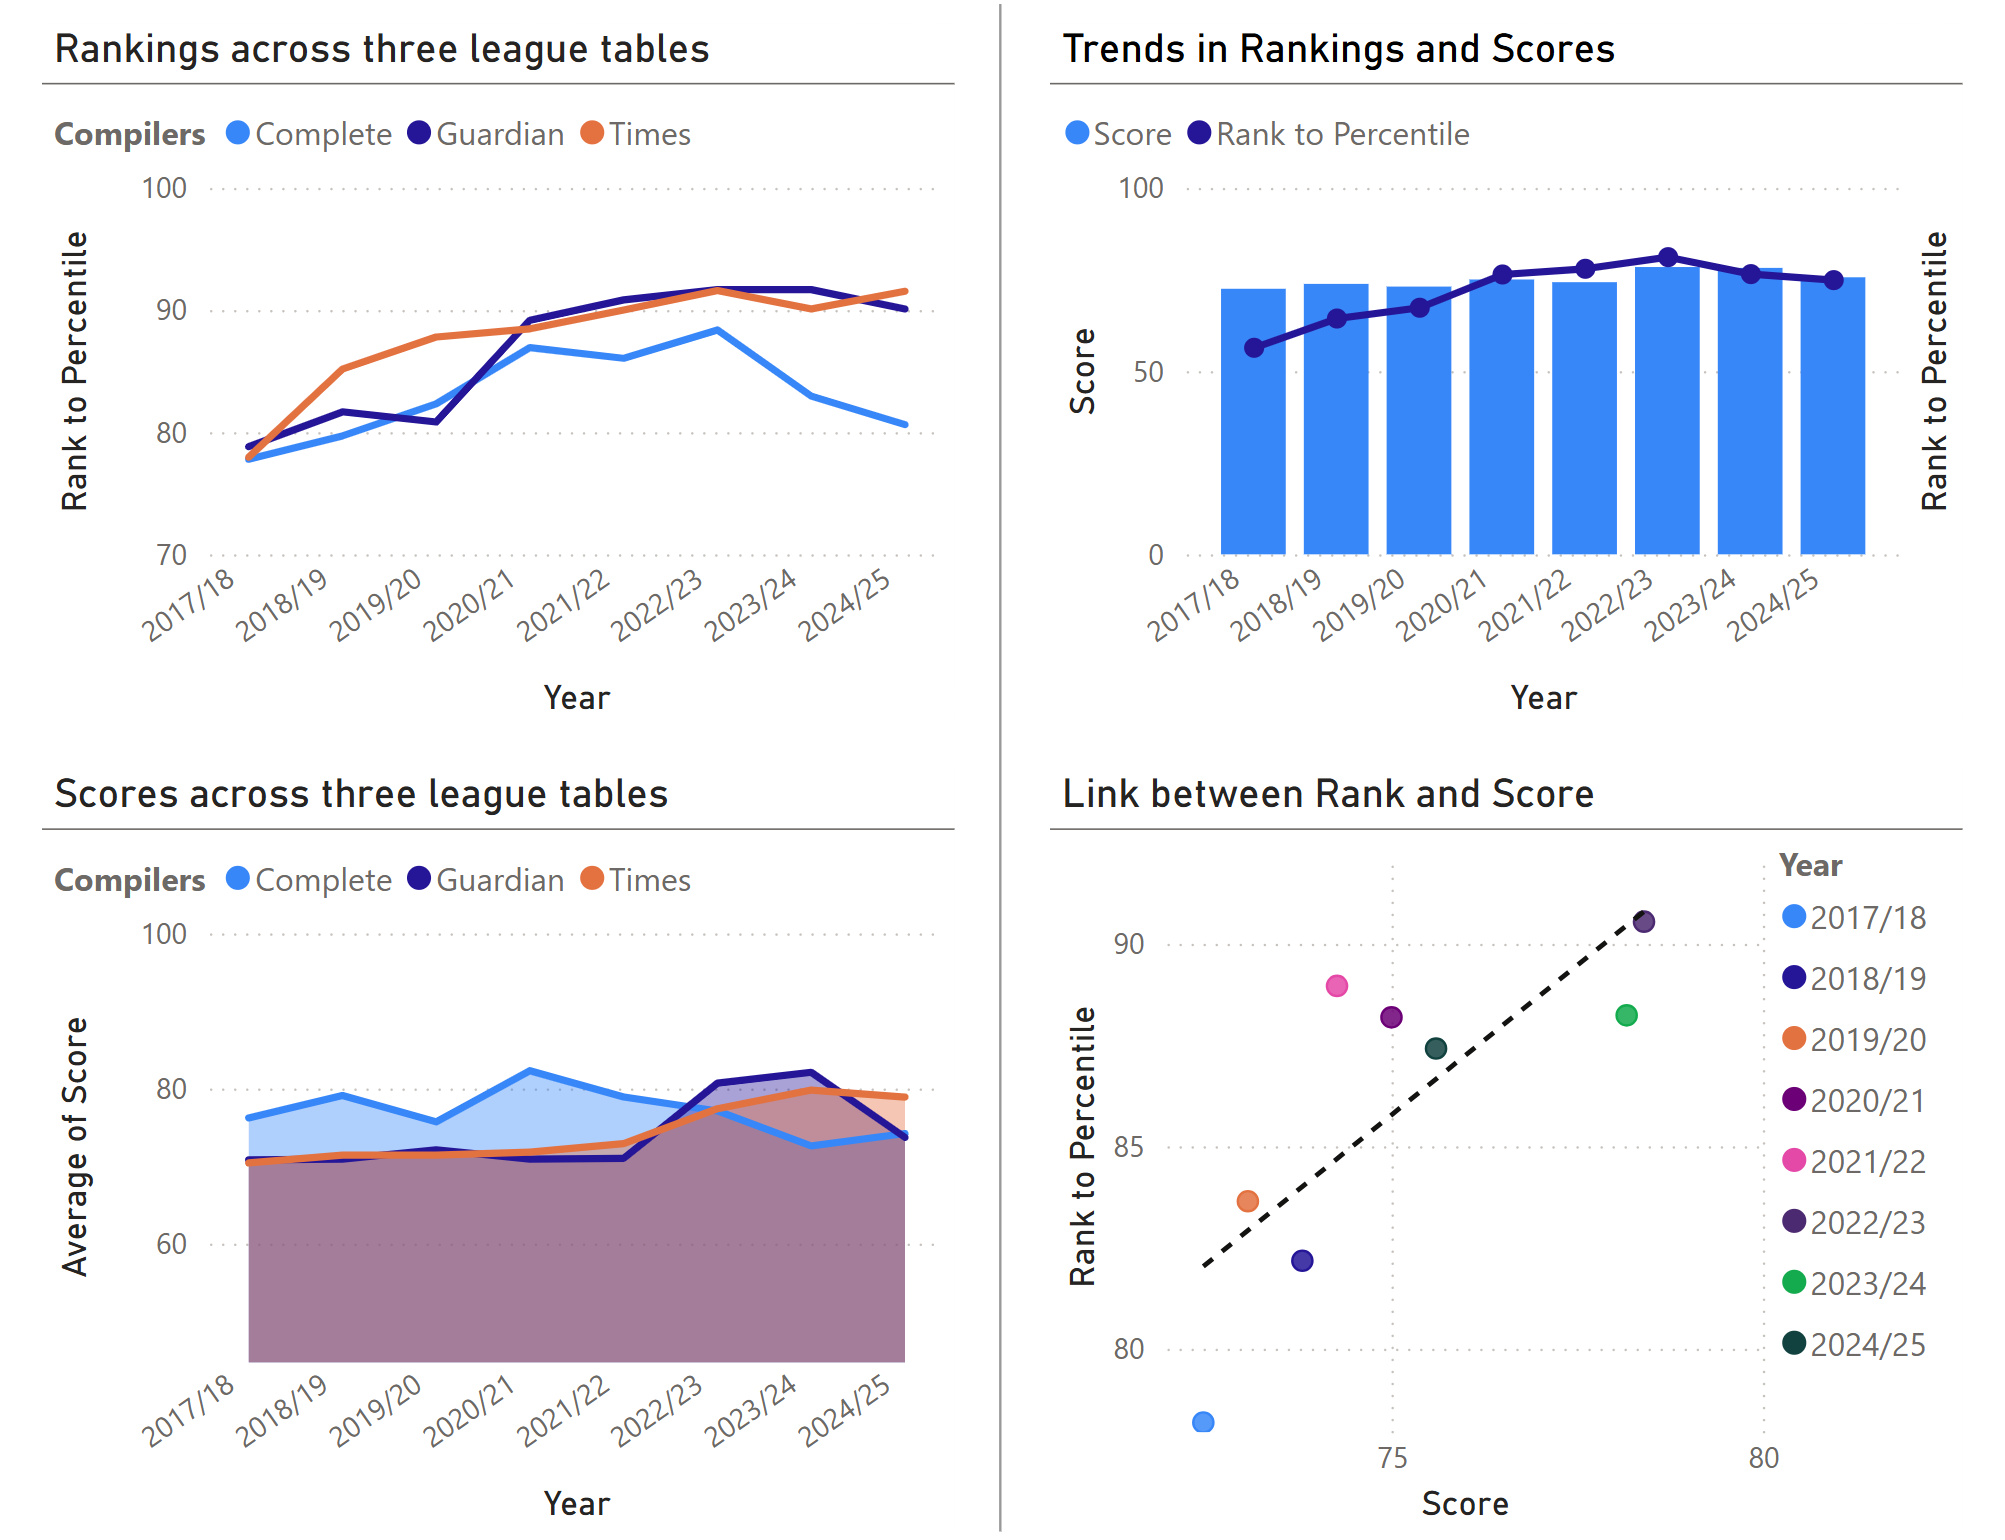

**Key Findngs:**
*   Consistent Excellence: The University of Glasgow has ranked within the top 30 domestically for a decade, with scores consistently above 75, reflecting strong performance.
*   Rankings ≠ Scores: Rankings don’t always align with scores due to varying methodologies or shared scores among universities.
*   Focus on Relative Performance: Evaluating rank relative to the number of competitors, with scores as a reference, provides a clearer picture of performance.

### **Examining the Link Between University Rankings and Student Population**

This analysis explores the relationship between university rankings and student enrolment, assessing their influence on student decisions and implications for university development and strategic planning.

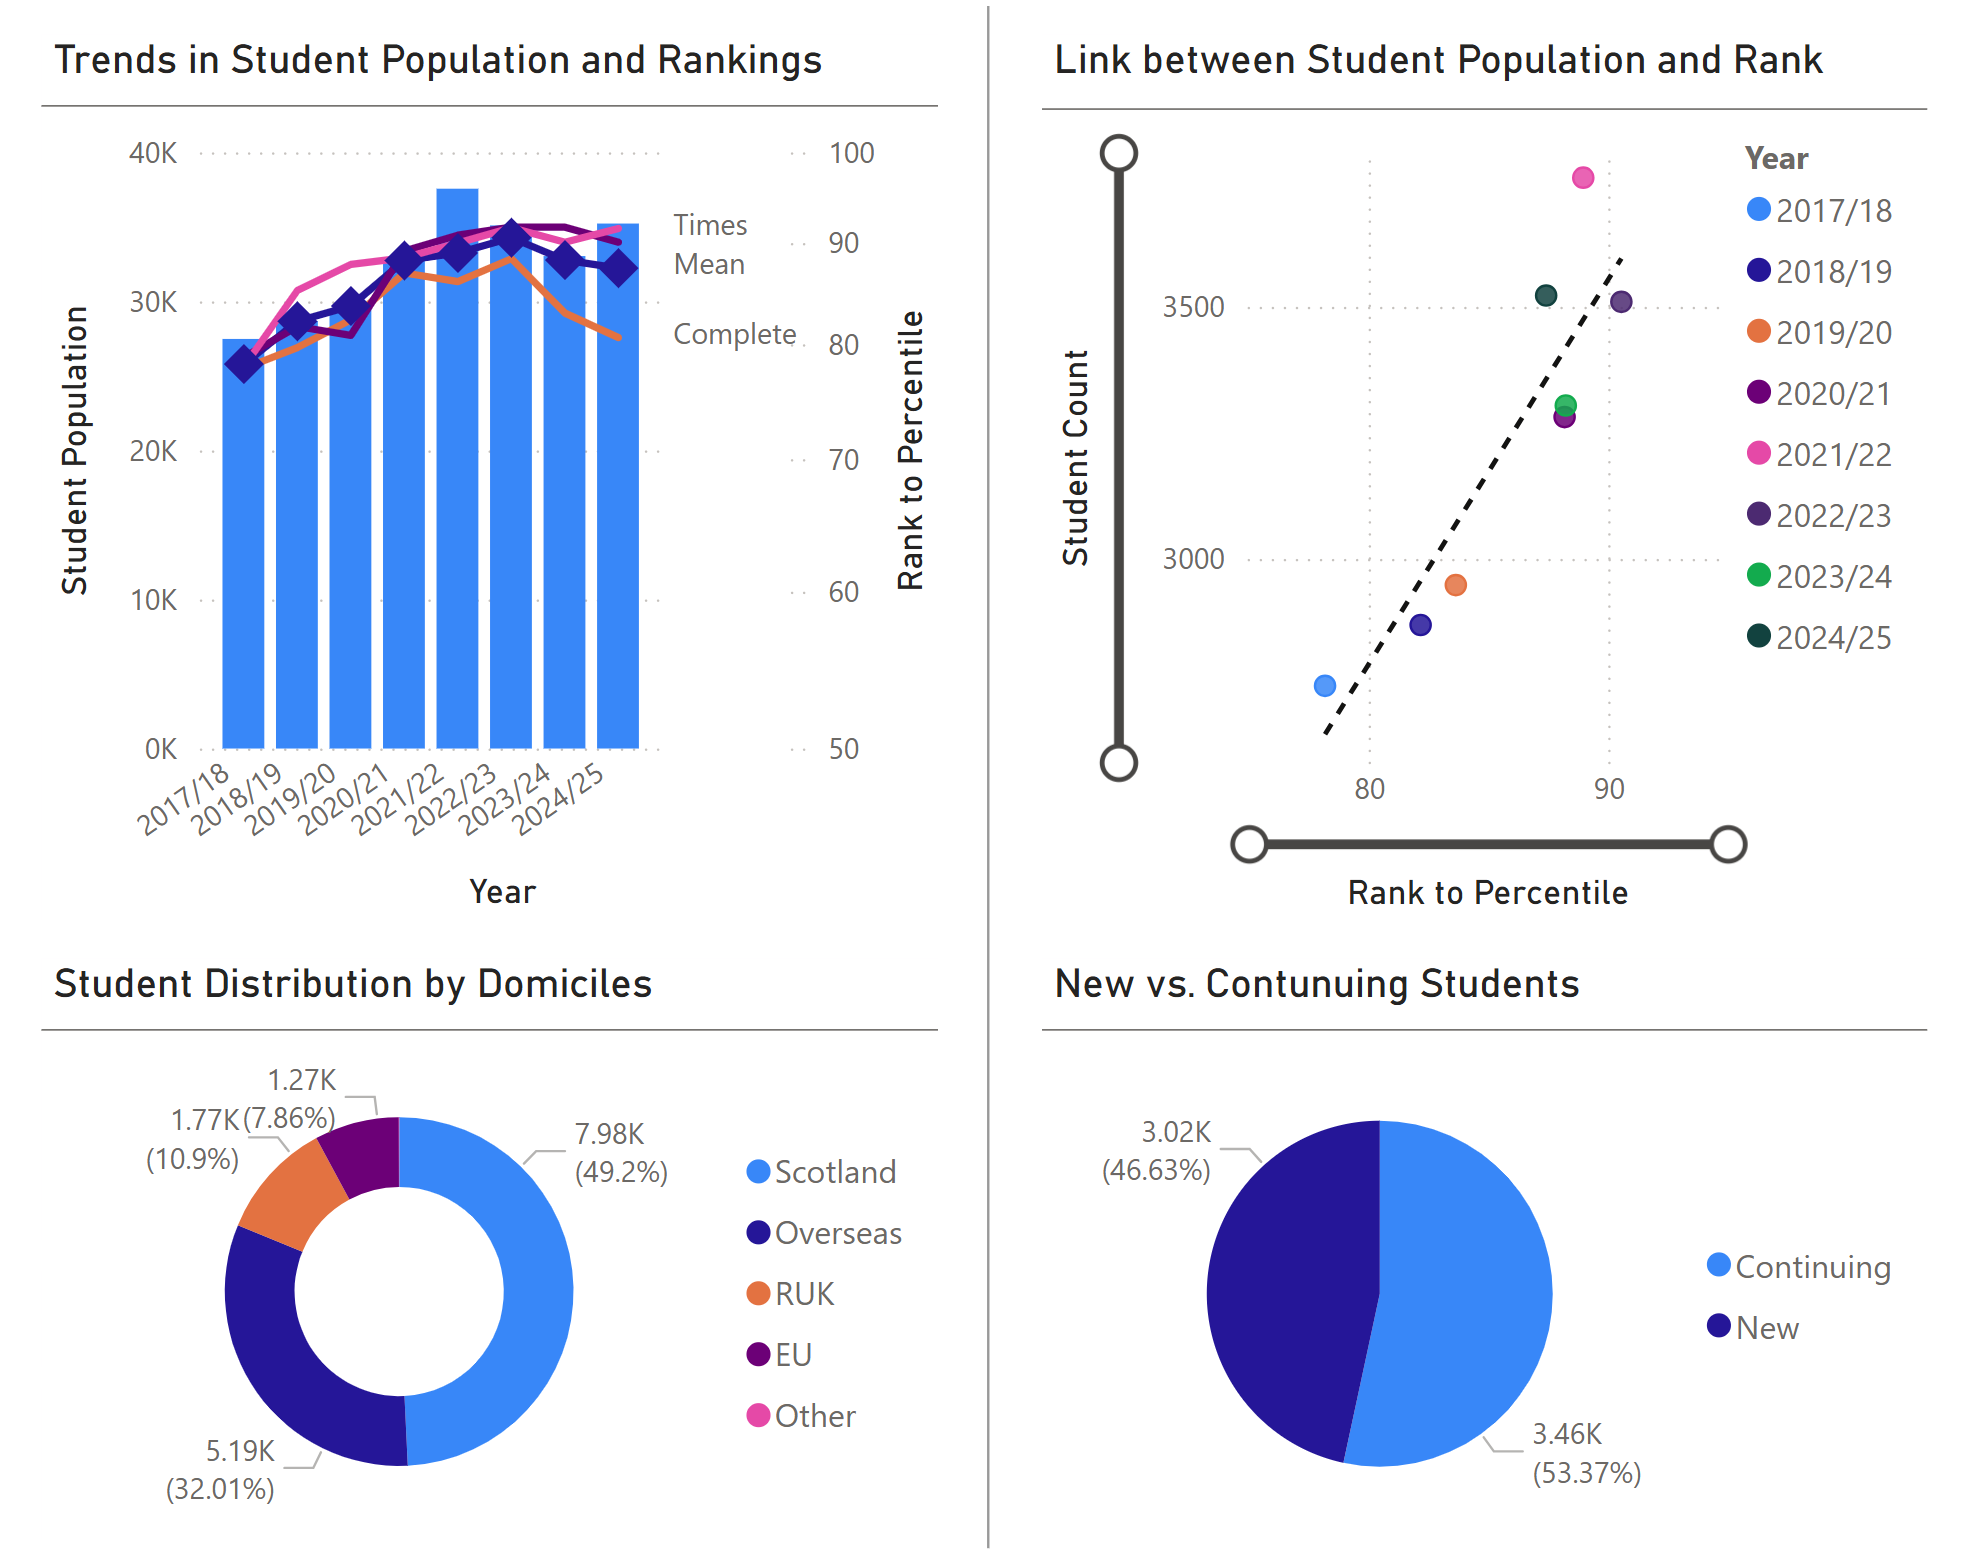

**Key Takeaways & Implications:**
*   Rankings Drive Enrolment: A strong correlation between university rankings and international student numbers suggests rankings significantly influence student decisions.
*   International Students Fuel Growth: International students have progressively accounted for a larger share of new enrolments since 2020, highlighting their growing impact on financial sustainability.
*   Local Student Retention: Continuing students are predominantly local, indicating the university’s strong appeal for long-term study among home students.
*   European Enrolment Decline: A drop in European students post-2020 suggests external factors like Brexit can have more influential than rankings in decision-making.

**Strategic Recommendations:**
*   Promote Rankings in Recruitment: Highlighting university rankings in marketing may help attract international students and contribute to increased enrolment and revenue.
*   Improve Local Student Retention and Postgraduate Conversion: Invest in initiatives to support local student retention and encourage progression to postgraduate study, enhancing the student experience and potentially strengthening the university's domestic performance.
*   Adjust Recruitment for European Students: Reevaluate strategies for European students and explore alternative incentives to address post-Brexit trends.

**Future research**
*   Explore Independent Rankings: Investigate subject-specific rankings, teaching quality, and student satisfaction, and examine how these factors interact with recruitment trends.
*   Survey Student Decision-Making: Conduct a survey to gather insights on students' decision-making processes when applying and choosing universities. This will help inform targeting strategies and future planning for the institution.